In [1]:
library(tidyverse)
library(data.table)
library(dplyr)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
detoxify <- fread("OptimizedTweets_with_toxicity.csv",  encoding = "UTF-8")

In [4]:
colnames(detoxify)

[1] "Unnamed: 0"                      "entities"                       
 [3] "text"                            "conversation_id"                
 [5] "author_id"                       "in_reply_to_user_id"            
 [7] "id"                              "created_at"                     
 [9] "edit_history_tweet_ids"          "possibly_sensitive"             
[11] "attachments"                     "withheld"                       
[13] "public_metrics_retweet_count"    "public_metrics_reply_count"     
[15] "public_metrics_like_count"       "public_metrics_quote_count"     
[17] "public_metrics_impression_count" "clean_text"                     
[19] "polarity"                        "sentiment"                      
[21] "emojis"                          "username"                       
[23] "lang"                            "tweet_url"                      
[25] "toxicity_score"

In [5]:
options(scipen=999)

In [22]:

detoxify_filtered <- detoxify |>
select(text, author_id, username, public_metrics_impression_count, public_metrics_like_count, toxicity_score)|>
mutate(toxicity = if_else(toxicity_score >= 0.9, 1, 0))

In [6]:
 #change 0.8 to a different value to change theshold

detoxify_AT_authors <- detoxify_filtered |>
select(public_metrics_like_count, public_metrics_impression_count, username, toxicity)|>
mutate(public_metrics_impression_count = as.numeric(public_metrics_impression_count))|>
na.omit()|>
group_by(username)|>
mutate(n_total_tweets = n()) |>  # Calculate total number of tweets per user
mutate(n_toxic_tweets = sum(toxicity))|>
mutate(pct_toxic_tweets = n_toxic_tweets / n_total_tweets * 100)|> 
mutate(likes_total = sum(public_metrics_like_count))|>
mutate(likes_mean = mean(public_metrics_like_count))|>
mutate(impressions_total = sum(public_metrics_impression_count))|>
mutate(impressions_mean = mean(public_metrics_impression_count))|>
filter(toxicity==1)|>
mutate(likes_total_toxic = sum(public_metrics_like_count))|>
mutate(likes_mean_toxic = mean(public_metrics_like_count))|>
mutate(impressions_total_toxic = sum(public_metrics_impression_count))|>
mutate(impressions_mean_toxic = mean(public_metrics_impression_count))|>
select(username, pct_toxic_tweets, n_toxic_tweets, likes_total, likes_mean, impressions_total, impressions_mean, likes_total_toxic, likes_mean_toxic, impressions_total_toxic, impressions_mean_toxic)|>
distinct()

detoxify_AT_authors

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `public_metrics_impression_count =
  as.numeric(public_metrics_impression_count)`.
Caused by warning:
! NAs introduced by coercion"


username,pct_toxic_tweets,n_toxic_tweets,likes_total,likes_mean,impressions_total,impressions_mean,likes_total_toxic,likes_mean_toxic,impressions_total_toxic,impressions_mean_toxic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
@picardonhealth,4.3317791,4190,354727,3.667301,2937926,30.3733808,6249,1.4914081,15408,3.677326969
@AlikaMD,2.5654485,391,81723,5.362050,689182,45.2189489,1069,2.7340153,995,2.544757033
@hgagneTVA,0.3048780,2,847,1.291159,1834,2.7957317,0,0.0000000,0,0.000000000
@AntibioticDoc,3.4317485,895,88381,3.388842,674267,25.8537960,1378,1.5396648,6014,6.719553073
@ErnieHudsonPEI,2.7548209,20,2485,3.422865,29989,41.3071625,33,1.6500000,821,41.050000000
@imgrund,4.3653384,7023,527387,3.278119,265934,1.6529857,13308,1.8949167,5741,0.817456927
@shazmamithani,4.0609137,576,48525,3.421108,428484,30.2089679,921,1.5989583,4718,8.190972222
@DeNovo_Fatima,3.5545410,436,42132,3.434861,42291,3.4478233,657,1.5068807,1362,3.123853211
@GermhunterMD,0.9823308,154,57072,3.640492,753653,48.0738024,327,2.1233766,1074,6.974025974


In [74]:
print(detoxify_AT_authors$username)

  [1] "@picardonhealth"  "@AlikaMD"         "@hgagneTVA"      
  [4] "@AntibioticDoc"   "@ErnieHudsonPEI"  "@imgrund"        
  [7] "@shazmamithani"   "@DeNovo_Fatima"   "@GermhunterMD"   
 [10] "@moirawyton"      "@paimadhu"        "DrKathleenRoss1" 
 [13] "@cdube_sante"     "@LisaBarrettID"   "@CMOH_NL"        
 [16] "@adriandix"       "@BirinderNarang"  "@jkwan_md"       
 [19] "@ASPphysician"    "@jyangstar"       "@theresaboyle"   
 [22] "@glenpyle"        "@juliegreenMLA"   "@sciencemonkeyca"
 [25] "@VeraEtches"      "@sarperotto"      "@drmwarner"      
 [28] "@CaulfieldTim"    "@wickdchiq"       "@BogochIsaac"    
 [31] "@carlyweeks"      "@SteiniBrown"     "@KatharineSmart" 
 [34] "@KashPrime"       "@bornk"           "@RicharLisa"     
 [37] "@LaurenPelley"    "@KindrachukJason" "@blackdocscanada"
 [40] "@drgigiosler"     "@everetthindley"  "@Johnrockdoc"    
 [43] "@epdevilla"       "@NoLore"          "@conquercovid19" 
 [46] "@cmcovidtf"       "@naheedD"         "@NightShif

In [32]:
men <- list("adriandix", "AlikaMD", "ASPphysician", "BogochIsaac", "CaulfieldTim", 
            "cdube_sante", "deonandan", "Dr_ChrisSimpson", "drfisman", "drmwarner", 
            "ErnieHudsonPEI", "everetthindley", "First10EM", "GermHunterMD", "imgrund", 
            "IrfanDhalla", "j_mcelroy", "jasonfherring", "Johnrockdoc", "Justin_Ling", 
            "KashPrime", "Kevin__Parent", "KindrachuckJason", "kwadwo777", "MerrimanPaul", 
            "NaheedD", "NathanStall", "NightShiftMD", "paimadhu", "picardonhealth", 
            "roussin_brent", "SammyG_MD", "sciencemonkeyca", "sdbaral", "shandro", 
            "srinmurthy99", "SteiniBrown", "TorontoIDDOC", "UbakaOgbogu", "VikCBC", 
            "zachchurchill", "zchagla")

women <- list("AmyGreerKalisz", "angie_rasmussen", "AnnaBlakney", "AntibioticDoc", "binhanv", 
              "bornk", "carlyweeks", "ChiefSciCan", "CMOH_Alberta", "CMOH_NL", "CPHO_Canada", 
              "ctouzin", "CTV_AvisFavaro", "DeNovo_Fatima", "drgigiosler", "DrKaliBarrett", 
              "drsusanshaw", "DrVivianS", "egpayne", "epdevilla", "glenpyle", "heysciencesam", 
              "IDEpiPhD", "iPreetBrar", "jfrketich", "jkwan_md", "JuliaWongCBC", "juliegreenMLA", 
              "jyangstar", "KatharineSmart", "KrishanaSankar", "LaurenPelley", "LisaBarrettID", 
              "MLAStefanson", "moriartylabs", "moirawyton", "MPaiMD", "NoLore", "PattyHajdu", 
              "RicharLisa", "sabiVM", "SciChefCan", "sarperotto", "shazmamithani", "ShephardDorothy", 
              "theresaboyle", "VeraEtches", "wickdchiq", "DrKathleenRoss1")

men <- paste0("@", men)
women <- paste0("@", women)

Gender-based analysis:

findings:
- Men recieved more toxic tweets overall, but women recieved more toxic tweets as a proportion of all tweets directed at women.
- Women had a higher average toxicity score, at 0.10963852 for women compared to 0.09825156 for men.
- Women also had a higher average toxicity score for tweets labelled as toxic (>= 0.8), at 0.9255078 for women and 0.9245738 for men.

In [64]:
detoxify_filtered_gender <- detoxify_filtered|>
mutate(gender = case_when(
    username %in% men ~ "male",
    username %in% women ~ "female"))|>
select(gender, username, toxicity, toxicity_score)

mean_toxicity_men <- detoxify_filtered_gender|>
filter(gender == "male")|>
mutate(n_tweets = n())|>
mutate(mean_toxicity = mean(toxicity_score))|> #average toxicity score, regardless of wether or not it is toxic
mutate(sum_toxic = sum(toxicity))|> #total number of tweets labelled "toxic" (toxicity_score >= 0.8) 
mutate(pct_toxic = sum_toxic/n_tweets*100)|> 
filter(toxicity_score >= 0.8)|>
mutate(mean_toxicity_toxic = mean(toxicity_score))|>
select(mean_toxicity, mean_toxicity_toxic, sum_toxic, pct_toxic)|>
distinct()

mean_toxicity_women <- detoxify_filtered_gender|>
filter(gender == "female")|>
mutate(n_tweets = n())|>
mutate(mean_toxicity = mean(toxicity_score))|> #average toxicity score, regardless of wether or not it is toxic
mutate(sum_toxic = sum(toxicity))|> #total number of tweets labelled "toxic" (toxicity_score >= 0.8) 
mutate(pct_toxic = sum_toxic/n_tweets*100)|>
filter(toxicity_score >= 0.8)|>
mutate(mean_toxicity_toxic = mean(toxicity_score))|>
select(mean_toxicity, mean_toxicity_toxic,  sum_toxic, pct_toxic)|>
distinct()

gender_based_toxicity <- data.frame(gender = c("male", "female"),
                            mean_toxicity = c(mean_toxicity_men$mean_toxicity, mean_toxicity_women$mean_toxicity),
                            mean_toxicity_toxic = c(mean_toxicity_men$mean_toxicity_toxic, mean_toxicity_women$mean_toxicity_toxic),
                            sum_toxic = c(mean_toxicity_men$sum_toxic, mean_toxicity_women$sum_toxic),
                            pct_toxic = c(mean_toxicity_men$pct_toxic, mean_toxicity_women$pct_toxic))
gender_based_toxicity

gender,mean_toxicity,mean_toxicity_toxic,sum_toxic,pct_toxic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
male,0.09825156,0.9245738,60834,2.848599
female,0.10963852,0.9255078,34535,3.627767


In [83]:
health_official <- list("CDCofBC", "ChiefSciCan", "CMOH_Alberta", "CMOH_NL", "CPHO_Canada", "epdevilla", "OttawaHealth", "roussin_brent", "StrangRobert", "VeraEtches")
expert <- list("BogochIsaac", "CaulfieldTim", "DeNovo_Fatima", "deonandan", "DFisman", "Dr_ChrisSimpson", "drgigiosler", "DrKaliBarrett", "drmwarner", "drsusanshaw", "DrVivianS", "First10EM", "GermHunterMD", "goaliegirlmom31", "heysciencesam", "IDEpiPhD", "imgrund", "iPreetBrar", "IrfanDhalla", "jkwan_md", "jonathanstea", "KashPrime", "Kevin__Parent", "KindrachukJason", "KrishanaSankar", "kwadwo777", "LisaBarrettID", "MoriartyLab", "MPaiMD", "NaheedD", "NathanStall", "paimadhu", "RicharLisa", "sabivm", "SammyG_MD", "SciChefCan", "sdbaral", "SharkawyMD", "shazmamithani", "SteiniBrown", "TorontoIDDOC", "UbakaOgbogu", "zchagla")
civil_society_groups <- list("blackdocscanada", "cmcovidtf", "conquercovid19", "COVID_19_Canada", "COVIDSciOntario", "McGillOSS", "sacovidtf", "ScienceUpFirst", "thisisourshotca", "VaxHuntersCan")
journalist <- list("asapscience", "binhanv", "carlyweeks", "ctouzin", "CTV_AvisFavaro", "egpayne", "j_mcelroy", "jasonfherring", "jfrketich", "JWongGlobalNews", "jyangstar", "LaurenPelley", "NightShiftMD", "NoLore", "picardonhealth", "sharon_kirkey", "theresaboyle", "VikCBC")
politician <- list("adriandix", "cdube_sante", "celliottability", "ErnieHudsonPEI", "everetthindley", "Johnrockdoc", "juliegreenMLA", "MerrimanPaul", "MLAStefanson", "PattyHajdu", "shandro", "ShephardDorothy", "zachchurchill")
expert_university <- list("AmyGreerKalisz", "angie_rasmussen", "AnnaBlakney", "AntibioticDoc", "ASPphysician")
medical_professional<- list("AlikaMD")


health_official <- paste0("@", health_official)
expert <- paste0("@", expert)
civil_society_groups <- paste0("@", civil_society_groups)
journalist <- paste0("@", journalist)
politician <- paste0("@", politician)
expert_university <- paste0("@", expert_university)
medical_professional <- paste0("@", medical_professional)

In [104]:
detoxify_filtered_job <- detoxify_filtered|>
mutate(profession = case_when(
    username %in% health_official ~ "health_official",
    username %in% expert ~ "expert",
    username %in% civil_society_groups ~ "civil_society_groups",
    username %in% journalist ~ "journalist",
    username %in% politician ~ "politician",
    username %in% expert_university ~ "expert_university",
    username %in% medical_professional ~ "medical_professional"))|>
select(profession, username, toxicity, toxicity_score)|>
filter(!is.na(profession))

In [105]:

mean_toxicity_profession <- function(profession_type) {
  detoxify_filtered_job |>
    filter(profession == profession_type) |>
    mutate(n_tweets = n()) |>
    mutate(mean_toxicity = mean(toxicity_score, na.rm = TRUE)) |>
    mutate(sum_toxic = sum(toxicity, na.rm = TRUE)) |>
    mutate(pct_toxic = sum_toxic / n_tweets * 100) |>
    filter(toxicity_score >= 0.8) |>
    mutate(mean_toxicity_toxic = mean(toxicity_score, na.rm = TRUE)) |>
    select(mean_toxicity, mean_toxicity_toxic, sum_toxic, pct_toxic) |>
    distinct()
}

mean_toxicity_health_official <- mean_toxicity_profession("health_official")
mean_toxicity_expert <- mean_toxicity_profession("expert")
mean_toxicity_civil_society_groups <- mean_toxicity_profession("civil_society_groups")
mean_toxicity_journalist <- mean_toxicity_profession("journalist")
mean_toxicity_politician <- mean_toxicity_profession("politician")
mean_toxicity_expert_university <- mean_toxicity_profession("expert_university")
mean_toxicity_medical_professional <- mean_toxicity_profession("medical_professional")

In [106]:

job_based_toxicity <- data.frame(
  profession = c("health_official", "expert", "civil_society_groups", 
                 "journalist", "politician", "expert_university", "medical_professional"),
  mean_toxicity = c(mean_toxicity_health_official$mean_toxicity,
                    mean_toxicity_expert$mean_toxicity,
                    mean_toxicity_civil_society_groups$mean_toxicity,
                    mean_toxicity_journalist$mean_toxicity,
                    mean_toxicity_politician$mean_toxicity,
                    mean_toxicity_expert_university$mean_toxicity,
                    mean_toxicity_medical_professional$mean_toxicity),
  mean_toxicity_toxic = c(mean_toxicity_health_official$mean_toxicity_toxic,
                          mean_toxicity_expert$mean_toxicity_toxic,
                          mean_toxicity_civil_society_groups$mean_toxicity_toxic,
                          mean_toxicity_journalist$mean_toxicity_toxic,
                          mean_toxicity_politician$mean_toxicity_toxic,
                          mean_toxicity_expert_university$mean_toxicity_toxic,
                          mean_toxicity_medical_professional$mean_toxicity_toxic),
  sum_toxic = c(mean_toxicity_health_official$sum_toxic,
                mean_toxicity_expert$sum_toxic,
                mean_toxicity_civil_society_groups$sum_toxic,
                mean_toxicity_journalist$sum_toxic,
                mean_toxicity_politician$sum_toxic,
                mean_toxicity_expert_university$sum_toxic,
                mean_toxicity_medical_professional$sum_toxic),
  pct_toxic = c(mean_toxicity_health_official$pct_toxic,
                mean_toxicity_expert$pct_toxic,
                mean_toxicity_civil_society_groups$pct_toxic,
                mean_toxicity_journalist$pct_toxic,
                mean_toxicity_politician$pct_toxic,
                mean_toxicity_expert_university$pct_toxic,
                mean_toxicity_medical_professional$pct_toxic)
)


In [107]:
job_based_toxicity

profession,mean_toxicity,mean_toxicity_toxic,sum_toxic,pct_toxic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
health_official,0.13112729,0.9280604,25109,4.850490
expert,0.09095329,0.9235885,34481,2.808759
civil_society_groups,0.07174040,0.9251654,1681,2.200089
journalist,0.10284193,0.9244690,18512,3.324731
politician,0.09937762,0.9263779,11339,2.060909
expert_university,0.07715666,0.9202729,2552,2.143619
medical_professional,0.06448592,0.9195110,241,1.581261


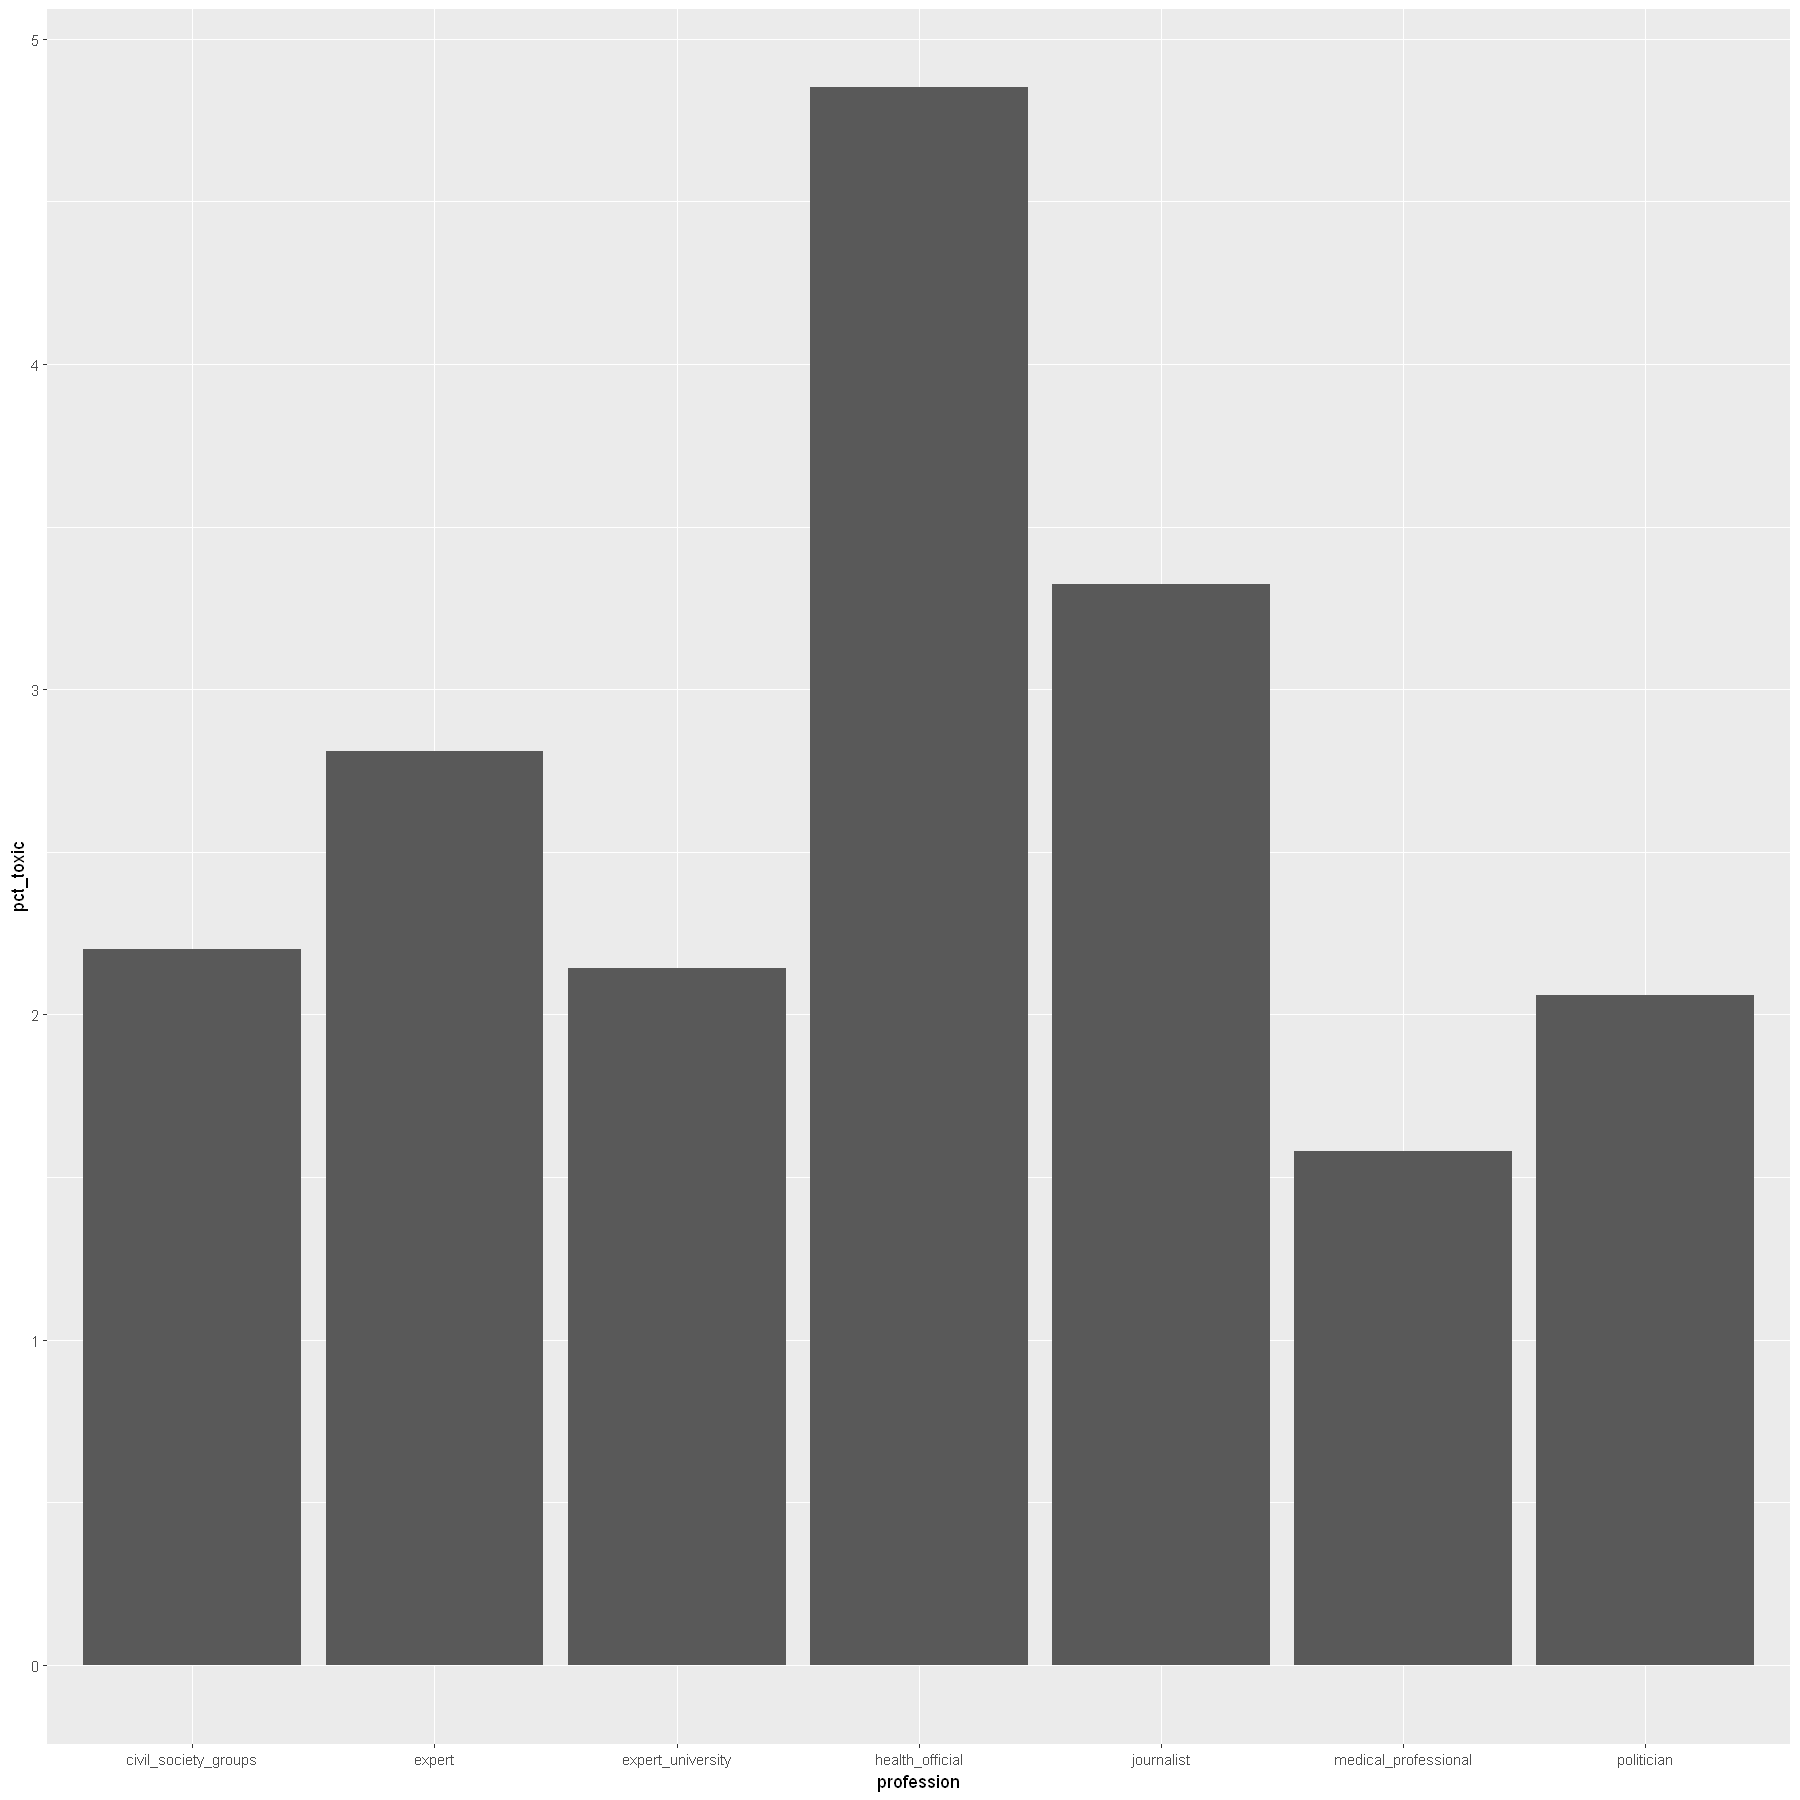

In [109]:
job_based_toxicity_graph <- job_based_toxicity|>
ggplot(aes(x=profession, y=pct_toxic))+geom_bar(stat="identity")
job_based_toxicity_graph

In [7]:
nfrf_IDs <- read_csv("nfrf_IDs.csv")

Rows: 110 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): username
dbl (1): id

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
detoxify_BY_authors <- detoxify_filtered |>
  select(public_metrics_like_count, public_metrics_impression_count, author_id, toxicity) |>
  mutate(public_metrics_impression_count = as.numeric(public_metrics_impression_count)) |>
  na.omit() |>
  group_by(author_id) |>
  summarise(
    n_total_tweets = n(),
    n_toxic_tweets = sum(toxicity),
    pct_toxic_tweets = n_toxic_tweets / n_total_tweets * 100,
    likes_total = sum(public_metrics_like_count),
    likes_mean = mean(public_metrics_like_count),
    impressions_total = sum(public_metrics_impression_count),
    impressions_mean = mean(public_metrics_impression_count),
    likes_total_toxic = sum(public_metrics_like_count[toxicity == 1]),
    likes_mean_toxic = mean(public_metrics_like_count[toxicity == 1]),
    impressions_total_toxic = sum(public_metrics_impression_count[toxicity == 1]),
    impressions_mean_toxic = mean(public_metrics_impression_count[toxicity == 1])
  ) |>
  mutate(is_health_official = author_id %in% nfrf_IDs$id) |>
  distinct()

detoxify_BY_authors

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `public_metrics_impression_count =
  as.numeric(public_metrics_impression_count)`.
Caused by warning:
! NAs introduced by coercion"


author_id,n_total_tweets,n_toxic_tweets,pct_toxic_tweets,likes_total,likes_mean,impressions_total,impressions_mean,likes_total_toxic,likes_mean_toxic,impressions_total_toxic,impressions_mean_toxic,is_health_official
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
246,106,0,0.000000,411,3.8773585,723,6.820755,0,NaN,0,NaN,FALSE
762,1,0,0.000000,1,1.0000000,32,32.000000,0,NaN,0,NaN,FALSE
985,5,0,0.000000,31,6.2000000,0,0.000000,0,NaN,0,NaN,FALSE
1176,1,0,0.000000,7,7.0000000,0,0.000000,0,NaN,0,NaN,FALSE
1326,11,0,0.000000,4,0.3636364,70,6.363636,0,NaN,0,NaN,FALSE
2075,1,0,0.000000,0,0.0000000,0,0.000000,0,NaN,0,NaN,FALSE
2654,2,0,0.000000,0,0.0000000,0,0.000000,0,NaN,0,NaN,FALSE
2656,234,0,0.000000,2370,10.1282051,46045,196.773504,0,NaN,0,NaN,FALSE
3302,2,0,0.000000,1,0.5000000,1231,615.500000,0,NaN,0,NaN,FALSE


In [9]:
write_csv(detoxify_BY_authors, "detoxify_BY_authors.csv")
write_csv(detoxify_AT_authors, "detoxify_AT_authors.csv")

In [24]:
detoxify_BY_authors_filtered <- detoxify_BY_authors|>
filter(n_toxic_tweets < 50)|>
arrange(desc(n_toxic_tweets))|>
pivot_longer(cols = c("likes_mean", "likes_total", "impressions_mean", "impressions_total"), 
               names_to = "metric", 
               values_to = "likes_impressions")|>
select(n_toxic_tweets, likes_impressions, metric,  is_health_official)

In [25]:
detoxify_BY_authors_filtered

n_toxic_tweets,likes_impressions,metric,is_health_official
<dbl>,<dbl>,<chr>,<lgl>
49,2.0721649,likes_mean,FALSE
49,603.0000000,likes_total,FALSE
49,29.6185567,impressions_mean,FALSE
49,8619.0000000,impressions_total,FALSE
49,3.9835526,likes_mean,FALSE
49,3633.0000000,likes_total,FALSE
49,1.1929825,impressions_mean,FALSE
49,1088.0000000,impressions_total,FALSE
49,12.7003817,likes_mean,FALSE


In [26]:
options(repr.plot.width =15, repr.plot.height =15) 

BY_graph <- detoxify_BY_authors_filtered |>
  ggplot(aes(x=n_toxic_tweets)) +
  geom_point(aes(y=likes_impressions), alpha=0.1) + 
  geom_smooth(aes(y=likes_impressions), color='navy', method = NULL)+
  facet_wrap(~ metric, scales = "free_y") +
  labs(y = "likes", color = "metric") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  theme_bw()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


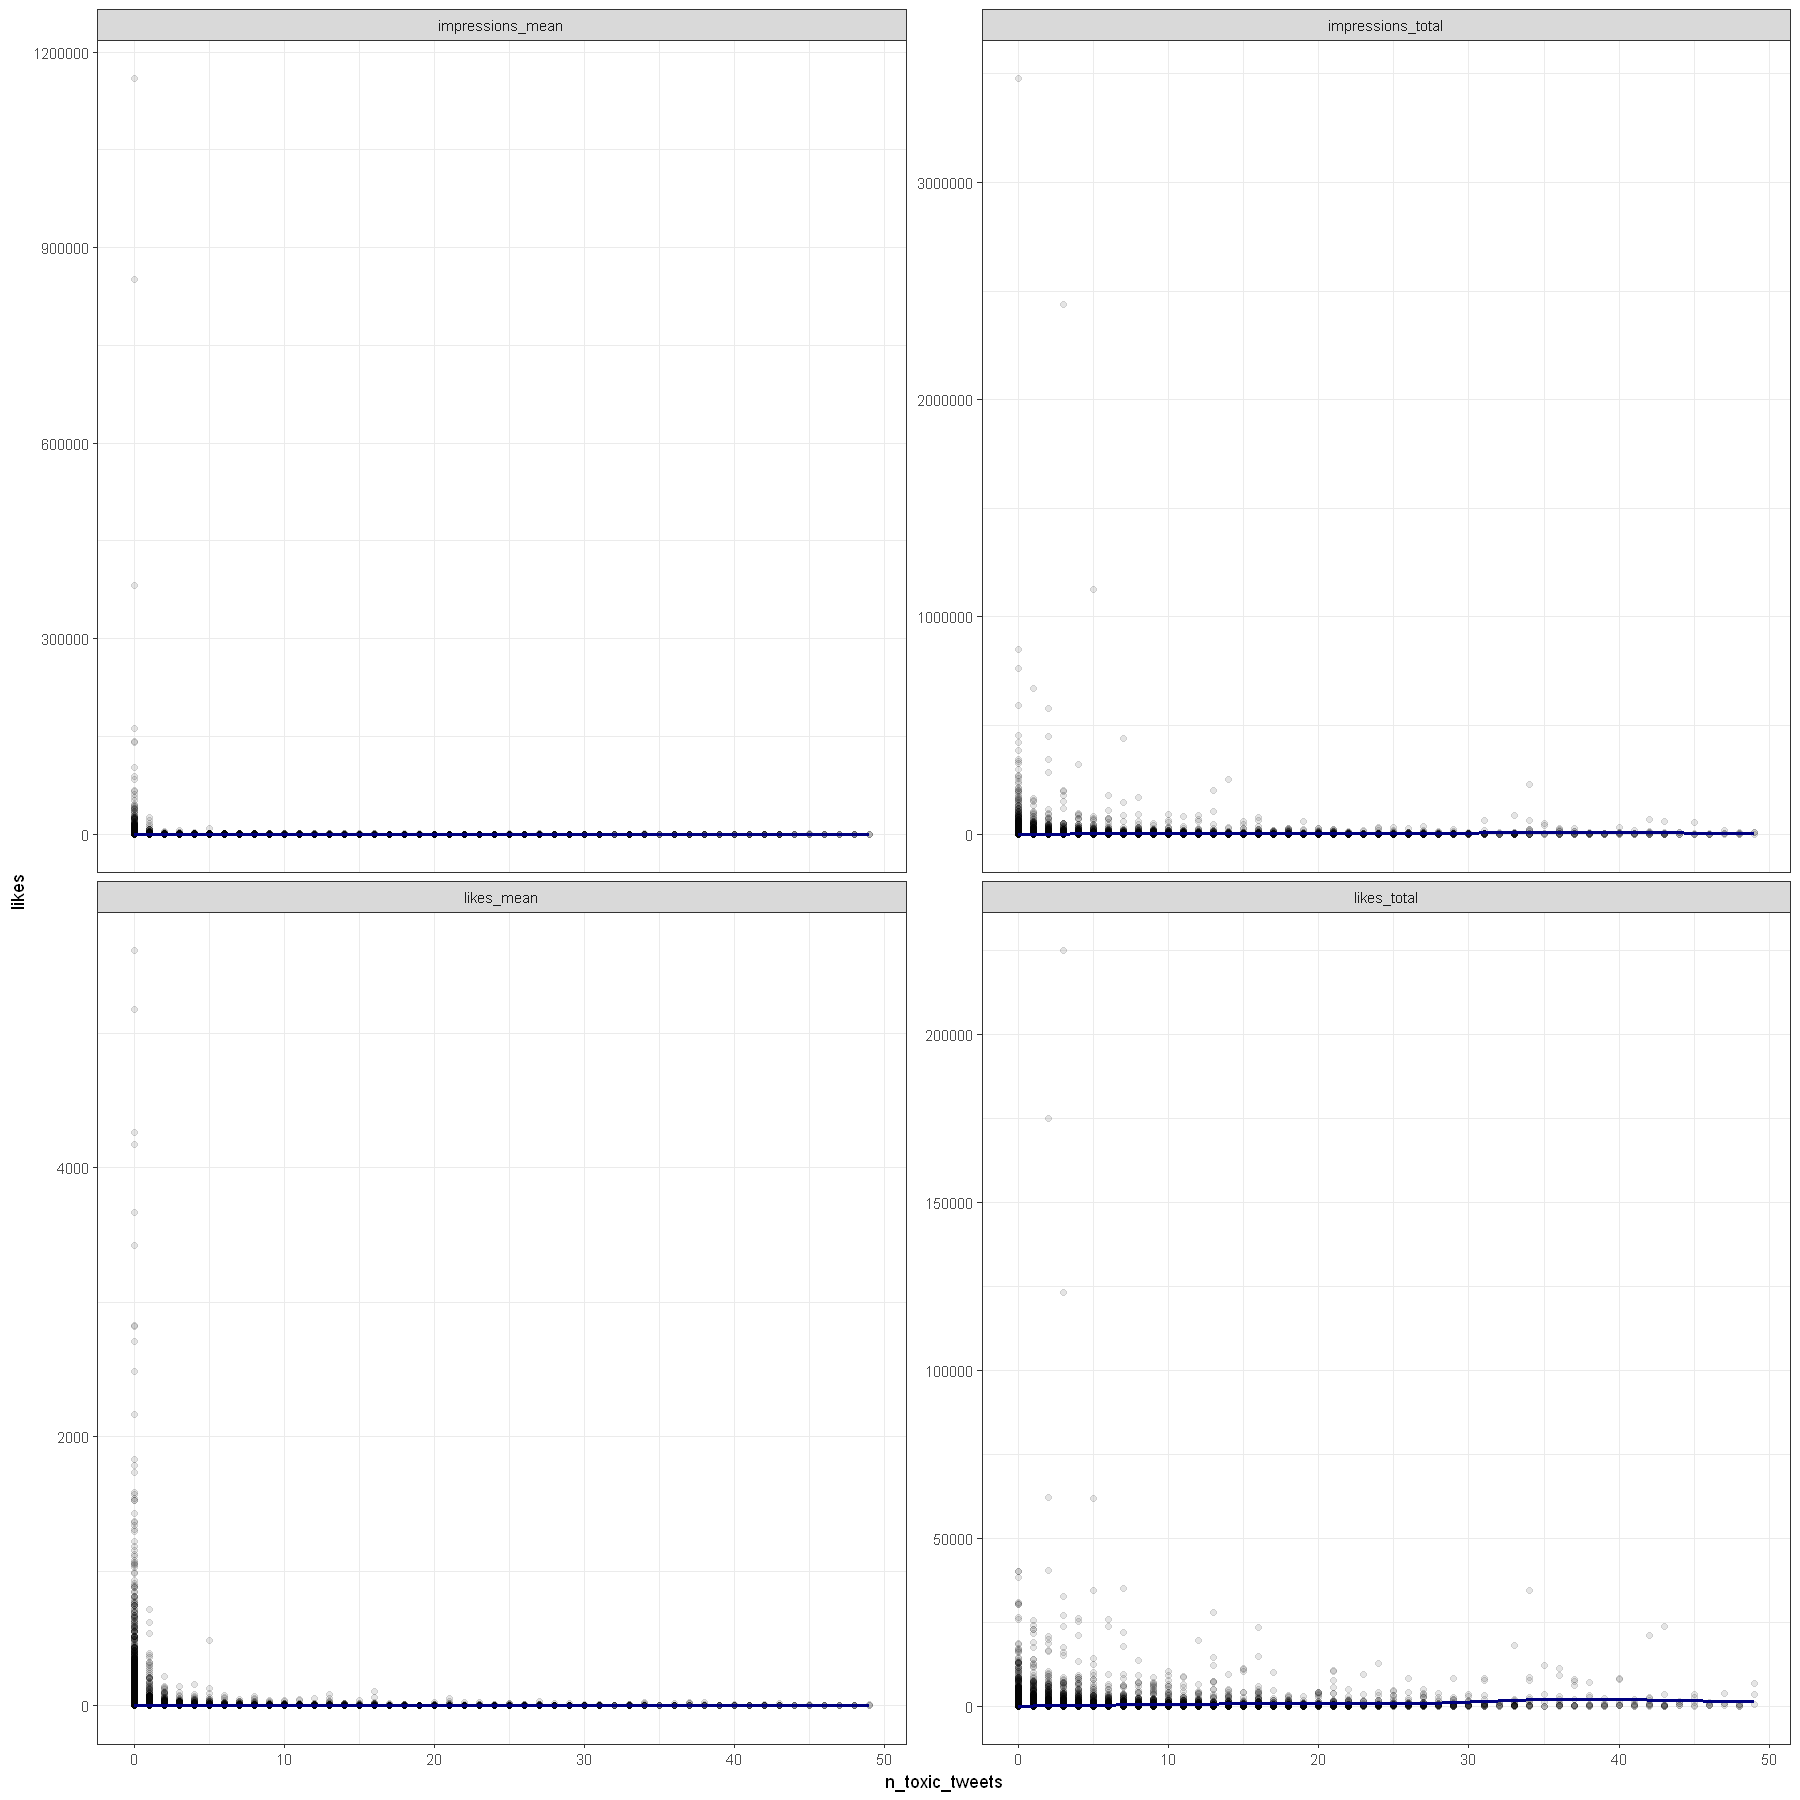

In [27]:
BY_graph

In [15]:
detoxify_filtered <- detoxify |>
select(text, author_id, username, public_metrics_impression_count, public_metrics_like_count, toxicity_score)
values <- data.frame(values = seq(0.1, 0.9, by = 0.05),
                     count = rep(0, length(seq(0.1, 0.9, by = 0.05))))

for (i in 1:nrow(values)) {
    value <- values$values[i]
    count <- 0
    for (individual_toxicity_score in detoxify_filtered$toxicity_score) {
        if (individual_toxicity_score >= value) {
            count <- count + 1
        }
    }
    values$count[i] <- count
} #nested for-loop for calculating the number of toxic tweets given a threshold in values$values

In [16]:
values

values,count
<dbl>,<dbl>
0.10,768866
0.15,656013
0.20,582670
0.25,529001
0.30,486458
0.35,450910
0.40,419288
0.45,390214
0.50,364419


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


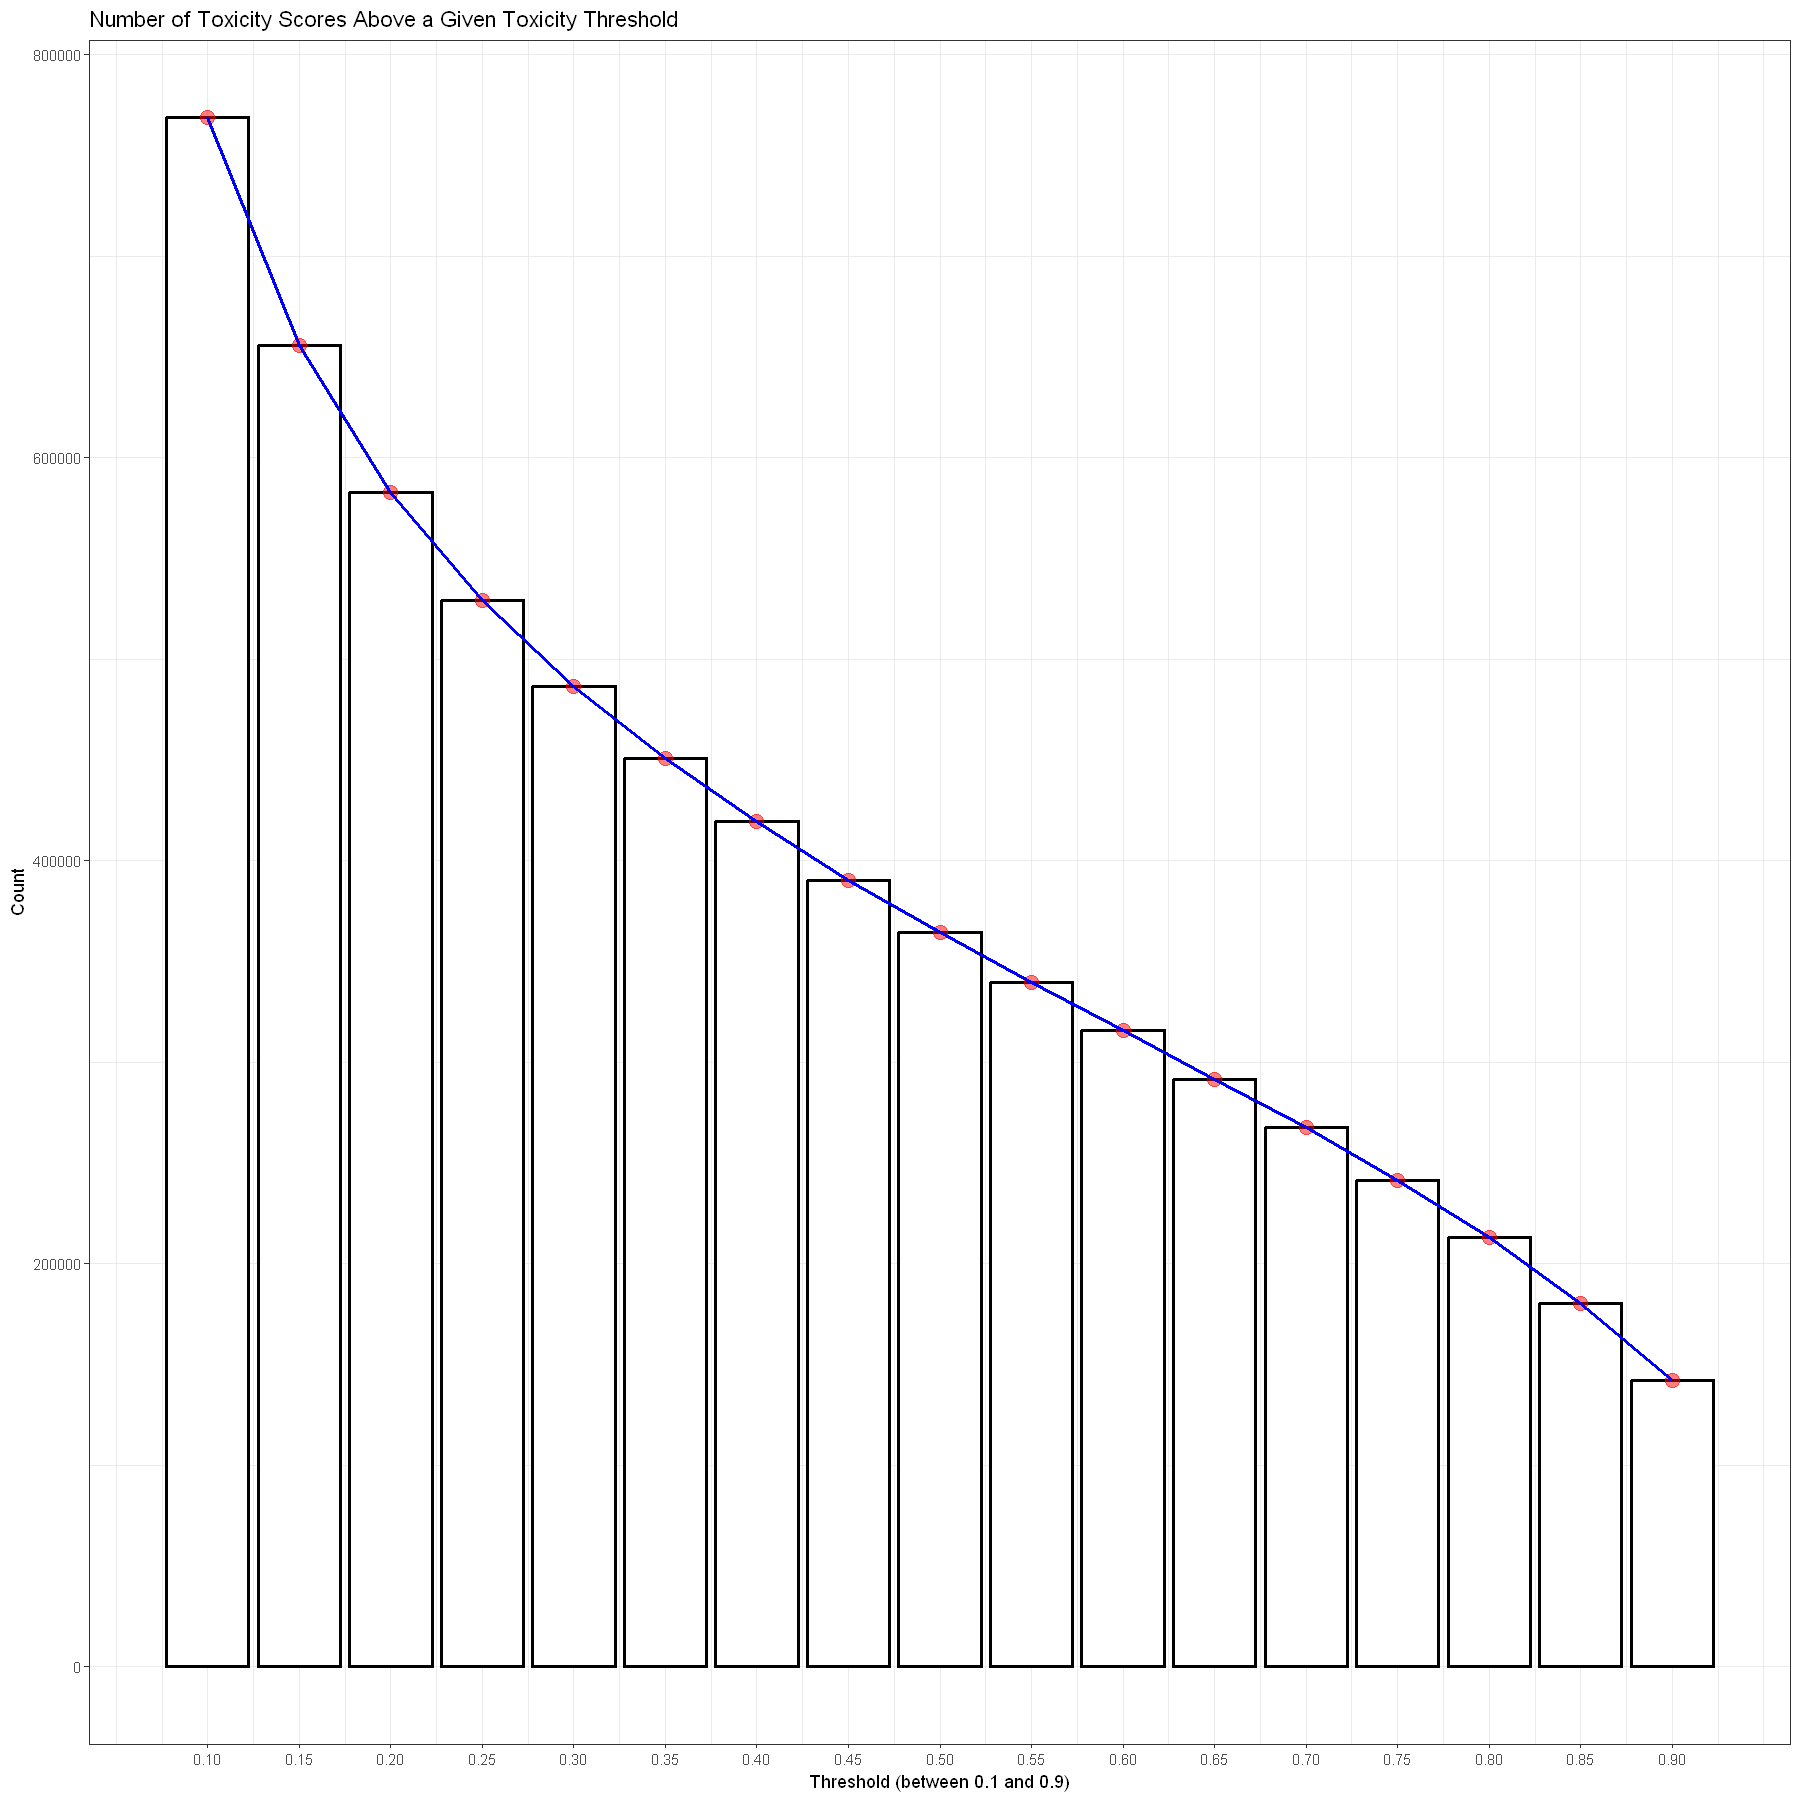

In [17]:
thesholds <- values |>
ggplot(aes(x=values, y=count))+
geom_bar(stat="identity", fill="white",color="black", size=1)+
geom_point(color="red", size=4, alpha=0.5)+
geom_line(color="blue", size=1)+
scale_x_continuous(breaks = seq(0.1, 0.9, by = 0.05)) +  
labs(x = "Threshold (between 0.1 and 0.9)", y = "Count", title = "Number of Toxicity Scores Above a Given Toxicity Threshold") +
theme_bw()
thesholds